# Access and Visualization of Time Series with WTSS

**WTSS** is a lightweight web service for handling remote sensing imagery as time series. Given a location and a time interval you can retrieve the according time series as a Python list of real values.

The WTSS interface provides three operations:
- `list_coverages`: returns the list of all available coverages in the service.
    
- `describe_coverage`: returns the metadata of a given coverage.

- `time_series`: query the database for the list of values for a given location and time interval.

## Python Client API

For running the examples in this Jupyter Notebook you will need to install the [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py). To install it from PyPI using pip, use the following command:

In [ ]:
!python -m pip install wtss

In order to access the funcionalities of the client API, you should import the wtss package, as follows:

In [21]:
from wtss import wtss

After that, you should create a wtss object attached to a given service:

In [22]:
client = wtss('http://www.esensing.dpi.inpe.br/')

The above cell will create an object named `client` that will allow us to comunicate to the given WTSS service.

## Listing the Available Data Products

The `list_coverages` operation allows the client to retrieve the capabilities provided by any server that implements WTSS. Or simply put, it returns a list of coverage names available in a server instance. The server response is a JSON document. The names returned by this operation can be used in subsequent operations.

In [ ]:
coverages = client.list_coverages()

In [ ]:
coverages

##  Retrieving the Metadata of a Data Product

The `describe_coverage` operation returns the metadata for a given coverage identified by its name. It includes its range in the spatial and temporal dimensions. It also receives a JSON document as a response.

In [ ]:
coverage_metadata = client.describe_coverage('MOD13Q1')

coverage_metadata.keys()

If you want to access the coverage attribute name, you can use the `attributes` key, as shown below:

In [ ]:
coverage_metadata["attributes"].keys()

The associated timeline can be accessed by the key `timeline`:

In [ ]:
timeline = coverage_metadata['timeline']

start = timeline[0]
end = timeline[-1]

print(f'Interval range: [{start}, {end}]')

The cell code below shows the spatial extent:

In [ ]:
coverage_metadata['spatial_extent']

## Retrieving the Time Series

The `time_series` operation retrieves the values associated to the time series for a set of coverage attributes at a given location.

The cell code below shows how to retrieve the values of the time series for the attribute `nir` from the `MOD13Q1` coverage.

In [ ]:
time_series = client.time_series("MOD13Q1", ("nir"), -12.0, -54.0, "2018-01-01", "2018-12-31")

In [ ]:
time_series.attributes["nir"]

The timeline is also available from the time series object:

In [ ]:
time_series.timeline

## Visualizing the Time Series with Matplotlib

### Installing Matplotlib

If  you do not have Matplotlib installed in your system, you can try to install through the conda or pip. For pip, you can try:

In [ ]:
!python -m pip install matplotlib

for conda you can try:

In [ ]:
!conda install -y matplotlib

### Plotting

In order to use the Matplotlib API we need to import the submodule `pyplot`:

In [ ]:
import matplotlib.pyplot as plt

Import also the `Numpy` library in order to generate x-axis ticks:

In [ ]:
import numpy as np

Let's define `x-axis` and `y-axis` values:

In [ ]:
# The x-axis will contain the time interval
x = [str(date) for date in time_series.timeline]

# The y-axis will contain the near-infra-red values
y = time_series.attributes["nir"]

We are going to create the time series chart with a red line:

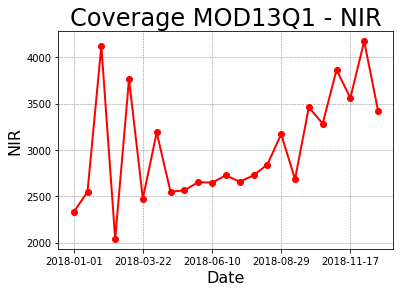

In [32]:
fig, ax = plt.subplots()

plt.title("Coverage MOD13Q1 - NIR", fontsize=24)

plt.xlabel("Date", fontsize=16)
plt.ylabel("NIR", fontsize=16)

plt.xticks(np.arange(0, len(x), step=5.0))

plt.grid(b=True, color='gray', linestyle='--', linewidth=0.5)

ax.plot(x, y, "ro-", linewidth=2.0)

plt.show()

## References

- [WTSS Specification](https://github.com/brazil-data-cube/wtss-spec)

- [WTSS Client API](https://github.com/brazil-data-cube/wtss.py)

- [WTSS Server](https://github.com/brazil-data-cube/wtss)

- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.